<a href="https://colab.research.google.com/github/riyarose18/Hack-o-weeks/blob/main/hackoweek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

zones = ['A', 'B', 'C', 'D']
data = []

for i in range(500):
    zone = np.random.choice(zones)
    occupancy = np.random.randint(0, 50)
    temperature = np.random.uniform(18, 40)
    humidity = np.random.uniform(30, 80)

    cooling_needed = 1 if (temperature > 28 and occupancy > 10) else 0

    data.append([zone, occupancy, temperature, humidity, cooling_needed])

df = pd.DataFrame(data, columns=[
    "zone", "occupancy", "temperature", "humidity", "cooling_needed"
])

df.to_csv("cooling_data.csv", index=False)

df.head()


,zone,occupancy,temperature,humidity,cooling_needed
0,C,28,22.035565,68.984550,0
1,A,38,27.808321,34.998746,0
2,C,23,25.341589,37.143341,0
3,C,21,19.241055,66.099939,0
4,B,37,18.017133,79.610578,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("cooling_data.csv")

# Encode zone
le = LabelEncoder()
df["zone"] = le.fit_transform(df["zone"])

X = df[["zone", "occupancy", "temperature", "humidity"]]
y = df["cooling_needed"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.98


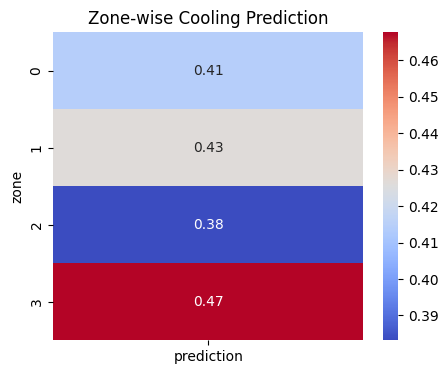

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict full dataset
df["prediction"] = model.predict(X)

# Group by zone
zone_summary = df.groupby("zone")["prediction"].mean().reset_index()

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(zone_summary.set_index("zone"), annot=True, cmap="coolwarm")
plt.title("Zone-wise Cooling Prediction")
plt.show()
